# **Partea I**

---


## ***1. Tipul problemei***

---


Problema de clasificare

## ***2. Generarea setului de date si impartirea lui in subsetul de antrenare si in cel de testare***

---



*Metoda de generare folosita este cea sintetica*

---


In [456]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Setam un seed pentru a putea genera exact aceleasi valori aleatoare
# atunci cand rulam de mai multe ori codul
np.random.seed(42)

# Facem o lista cu 10 nume de animale
nume_specii = ['Lup', 'Camila', 'Maimuta', 'Papagal', 'Bufnita', 'Strut', 'Vipera', 'Soparla', 'Sarpe Boa']

# Facem o functie ce genereaza o lista cu un numar de nume de specii
def genereaza_nume_specie(numar):
    return np.random.choice(nume_specii, numar)

# Facem o lista cu 1000 de nume de specii
lista_nume_specii = genereaza_nume_specie(1000)

# Facem o functie ce genereaza o lista cu 1000 de categorii de specii
def genereaza_categorie(lista_nume_specii):
    # Facem o lista pentru fiecare categorie cu ce nume de specii are
    mamifere = ['Lup', 'Camila', 'Maimuta', 'Sacal']
    pasari = ['Papagal', 'Bufnita', 'Strut']
    reptile = ['Vipera', 'Soparla', 'Sarpe Boa']
    categorii = []
    # Verificam fiecare nume din lista_nume_specii in ce lista se afla
    # si adaugam categoria in lista categorii
    for i in lista_nume_specii:
        if i in mamifere:
            categorii.append('Mamifer')
        elif i in pasari:
            categorii.append('Pasare')
        elif i in reptile:
            categorii.append('Reptila')
    return categorii


# Facem o functie ce genereaza o lista cu 1000 de categorii de specii
def genereaza_greutate_kg(lista_nume_specii):
    # Facem o lista cu greutati pentru fiecare nume de specie
    greutati = []
    # Pentru fiecare nume ii dam o valoare float rotunjita la 2 zecimale
    # din intervalul ei de greutate si o adaugam in lista greutati
    for i in lista_nume_specii:
        if i == 'Lup':
            greutati.append(np.round(np.random.uniform(0.1, 45.0), 2))
        elif i == 'Camila':
            greutati.append(np.round(np.random.uniform(0.1, 700.0), 2))
        elif i == 'Maimuta':
            greutati.append(np.round(np.random.uniform(0.1, 4.0), 2))
        # Pentru Papagal punem valoare lipsa
        elif i == 'Papagal':
            greutati.append(np.nan)
        # Pentru Bufnita punem valoare lipsa
        elif i == 'Bufnita':
            greutati.append(np.nan)
        elif i == 'Strut':
            greutati.append(np.round(np.random.uniform(0.1, 140.0), 2))
        # Pentru Vipera punem valoare lipsa
        elif i == 'Vipera':
            greutati.append(np.nan)
        elif i == 'Soparla':
            greutati.append(np.round(np.random.uniform(0.1, 0.3), 2))
        # Pentru Sarpe Boa punem valoare lipsa
        elif i == 'Sarpe Boa':
            greutati.append(np.nan)
    return greutati

# Facem o functie ce genereaza o lista cu 1000 de durate de viata a animalelor
def genereaza_durata_viata_ani(lista_nume_specii):
    # Facem o lista cu durate de viata pentru fiecare nume de specie
    durate = []
    # Pentru fiecare nume ii dam o valoare intreaga
    # din intervalul ei de durata de viata si o adaugam in lista durate
    for i in lista_nume_specii:
        if i == 'Lup':
            durate.append(np.random.randint(1, 16))
        elif i == 'Camila':
            durate.append(np.random.randint(1, 50))
        elif i == 'Maimuta':
            durate.append(np.random.randint(1, 27))
        elif i == 'Papagal':
            durate.append(np.random.randint(1, 60))
        elif i == 'Bufnita':
            durate.append(np.random.randint(1, 20))
        elif i == 'Strut':
            durate.append(np.random.randint(1, 3))
        elif i == 'Vipera':
            durate.append(np.random.randint(1, 15))
        elif i == 'Soparla':
            durate.append(np.random.randint(1, 20))
        elif i == 'Sarpe Boa':
            durate.append(np.random.randint(1, 30))
    return durate

# Facem o functie ce genereaza o lista cu 1000 de habitate pentru animale
def genereaza_habitat(lista_nume_specii):
    # Facem o lista pentru fiecare habitat cu ce nume de specii are
    padure = ['Lup', 'Bufnita']
    desert = ['Camila']
    jungla = ['Maimuta']
    habitat = []
    # Verificam fiecare nume din lista_nume_specii in ce lista se afla
    # si adaugam habitatul in lista habitat unele animale avand un habitat
    # iar altele avand un habitat aleator
    for i in lista_nume_specii:
        if i in padure:
            habitat.append('Padure')
        elif i in desert:
            habitat.append('Desert')
        elif i in jungla:
            habitat.append('Jungla')
        elif i == 'Vipera':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.5:
                habitat.append('Padure')
            else:
                habitat.append('Jungla')
        elif i == 'Strut':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.3:
                habitat.append('Padure')
            else:
                habitat.append('Desert')
        elif i == 'Soparla':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.2:
                habitat.append('Padure')
            elif np.round(np.random.uniform(0.0, 1.0), 2) < 0.5:
                habitat.append('Desert')
            else:
                habitat.append('Jungla')
        elif i == 'Sarpe Boa':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.7:
                habitat.append('Jungla')
            else:
                habitat.append('Padure')
        elif i == 'Papagal':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.2:
                habitat.append('Padure')
            else:
                habitat.append('Jungla')
    return habitat

# Facem o functie ce genereaza o lista cu 1000 de Da sau Nu in functie de pericolul de disparitie
def genereaza_pericol_disparitie(lista_nume_specii):
    pericol_de_disparitie = []
    # Fiecare animal are o sansa sa fie in pericol de disparitie
    for i in lista_nume_specii:
        if np.round(np.random.uniform(0.0, 1.0), 2) < 0.2:
            pericol_de_disparitie.append('Da')
        else:
            pericol_de_disparitie.append('Nu')
    return pericol_de_disparitie

# Facem o functie ce genereaza o lista cu 1000 de viteze pentru animale
def genereaza_viteza_Km_h(lista_nume_specii):
    # Facem o lista cu viteze pentru fiecare nume de specie
    viteze = []
    # Pentru fiecare nume ii dam o valoare float rotunjita la 2 zecimale
    # din intervalul ei de viteza si o adaugam in lista viteze
    for i in lista_nume_specii:
        if i == 'Lup':
            viteze.append(np.round(np.random.uniform(50.0, 60.0), 2))
        elif i == 'Camila':
            viteze.append(np.round(np.random.uniform(30.0, 65.0), 2))
        # Pentru Maimuta punem valoare lipsa
        elif i == 'Maimuta':
            viteze.append(np.nan)
        # Pentru Papagal punem valoare lipsa
        elif i == 'Papagal':
            viteze.append(np.nan)
        # Pentru Bufnita punem valoare lipsa
        elif i == 'Bufnita':
            viteze.append(np.nan)
        # Pentru Strut punem valoare lipsa
        elif i == 'Strut':
            viteze.append(np.nan)
        elif i == 'Vipera':
            viteze.append(np.round(np.random.uniform(2.0, 5.0), 2))
        elif i == 'Soparla':
            viteze.append(np.round(np.random.uniform(15.0, 20.0), 2))
        elif i == 'Sarpe Boa':
            viteze.append(np.round(np.random.uniform(0.5, 2.0), 2))
    return viteze

# Facem o functie ce genereaza o lista cu 1000 de inaltimi pentru animale
def genereaza_inaltime_m(lista_nume_specii):
    # Facem o lista cu inaltimi pentru fiecare nume de specie
    inaltimi = []
    # Pentru fiecare nume ii dam o valoare float rotunjita la 2 zecimale
    # din intervalul ei de inaltime si o adaugam in lista inaltimi
    for i in lista_nume_specii:
        # Pentru Lup punem valoare lipsa
        if i == 'Lup':
            inaltimi.append(np.nan)
        elif i == 'Camila':
            inaltimi.append(np.round(np.random.uniform(1.0, 2.0), 2))
        elif i == 'Maimuta':
            inaltimi.append(np.round(np.random.uniform(0.3, 1.0), 2))
        # Pentru Papagal punem valoare lipsa
        elif i == 'Papagal':
            inaltimi.append(np.nan)
        # Pentru Bufnita punem valoare lipsa
        elif i == 'Bufnita':
            inaltimi.append(np.nan)
        elif i == 'Strut':
            inaltimi.append(np.round(np.random.uniform(1.5, 2.5), 2))
        # Pentru Vipera punem valoare lipsa
        elif i == 'Vipera':
            inaltimi.append(np.nan)
        elif i == 'Soparla':
            inaltimi.append(np.round(np.random.uniform(0.05, 0.15), 2))
        # Pentru Sarpe Boa punem valoare lipsa
        elif i == 'Sarpe Boa':
            inaltimi.append(np.nan)
    return inaltimi
    

# Facem o functie ce genereaza o lista cu 1000 de culori pentru animale
def genereaza_culoare(lista_nume_specii):
    culoare = []
    # Luam fiecare nume de specie si in functie de el generam o culoare
    # in functie de probabilitate
    for i in lista_nume_specii:
        if i == 'Lup':
            if np.round(np.random.uniform(0.0, 1.0), 2) > 0.4:
                culoare.append('Cenusiu')
            else:
                culoare.append('Alb')
        elif i == 'Camila':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Bej')
            else:
                culoare.append('Maro')
        elif i == 'Maimuta':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Maro')
            else:
                culoare.append('Bej')
        elif i == 'Papagal':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Verde')
            elif np.round(np.random.uniform(0.0, 1.0), 2) < 0.3:
                culoare.append('Rosu')
            else:
                culoare.append('Albastru')
        elif i == 'Bufnita':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Alb')
            elif np.round(np.random.uniform(0.0, 1.0), 2) < 0.2:
                culoare.append('Negru')
            else:
                culoare.append('Gri')
        elif i == 'Strut':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Alb')
            else:
                culoare.append('Negru')
        elif i == 'Vipera':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Negru')
            elif np.round(np.random.uniform(0.0, 1.0), 2) < 0.3:
                culoare.append('Verde')
            else:
                culoare.append('Cenusiu')
        elif i == 'Soparla':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Verde')
            elif np.round(np.random.uniform(0.0, 1.0), 2) < 0.3:
                culoare.append('Alb')
            else:
                culoare.append('Maro')
        elif i == 'Sarpe Boa':
            if np.round(np.random.uniform(0.0, 1.0), 2) < 0.4:
                culoare.append('Alb')
            elif np.round(np.random.uniform(0.0, 1.0), 2) < 0.3:
                culoare.append('Maro')
            else:
                culoare.append('Verde')
    return culoare


# Facem un dictionar set_date cu toate coloanele pe care le denumim si apelam functiile corespunzatoare coloanelor
set_date = {
    'Nume Specie': lista_nume_specii,
    'Categorie': genereaza_categorie(lista_nume_specii),
    'Greutate (Kg)': genereaza_greutate_kg(lista_nume_specii),
    'Durata de viata (ani)': genereaza_durata_viata_ani(lista_nume_specii),
    'Habitat': genereaza_habitat(lista_nume_specii),
    'Pericol de disparitie': genereaza_pericol_disparitie(lista_nume_specii),
    'Viteza (Km/h)': genereaza_viteza_Km_h(lista_nume_specii),
    'Inaltime (m)': genereaza_inaltime_m(lista_nume_specii),
    'Culoare': genereaza_culoare(lista_nume_specii)
}

# Facem un dataframe cu dictionarul de mai sus
# si il denumim tabel
tabel = pd.DataFrame(set_date)

# Impartim datele in train si test (600 train, 400 test)
train, test = train_test_split(tabel, test_size=0.4, random_state=42)

# Salvam fisierele CSV fara index
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

## ***3. Analiza valorilor lipsa***

---


### **Train**

---


#### **Testam daca avem valori lipsa**

---


In [457]:
# Afisam numarul valorilor lipsa din fiecare coloana
print("Numar valori lipsa:\n")
numar_valori_lipsa = train.isnull().sum()
print(numar_valori_lipsa)
# Afisam procentul valorilor lipsa din fiecare coloana
print("\nProcent valori lipsa:\n")
# Luam numarul de randuri
numar_randuri = train.shape[0]
procent_lipsa = (numar_valori_lipsa / numar_randuri) * 100
print(procent_lipsa)

Numar valori lipsa:

Nume Specie                0
Categorie                  0
Greutate (Kg)            266
Durata de viata (ani)      0
Habitat                    0
Pericol de disparitie      0
Viteza (Km/h)            293
Inaltime (m)             342
Culoare                    0
dtype: int64

Procent valori lipsa:

Nume Specie               0.000000
Categorie                 0.000000
Greutate (Kg)            44.333333
Durata de viata (ani)     0.000000
Habitat                   0.000000
Pericol de disparitie     0.000000
Viteza (Km/h)            48.833333
Inaltime (m)             57.000000
Culoare                   0.000000
dtype: float64


#### **Completam cu media valorilor pentru coloanele Greutate (Kg), Viteza (Km/h), Inaltime (m)**

---


In [458]:
# Punem in fiecare coloana in locul valorilor lipsa media tuturor valorilor de pe coloana
train['Greutate (Kg)'] = train['Greutate (Kg)'].fillna(train['Greutate (Kg)'].mean())
train['Viteza (Km/h)'] = train['Viteza (Km/h)'].fillna(train['Viteza (Km/h)'].mean())
train['Inaltime (m)'] = train['Inaltime (m)'].fillna(train['Inaltime (m)'].mean())

#### **Testam daca s au completat**

---


In [459]:
# Afisam numarul valorilor lipsa din fiecare coloana
print("Numar valori lipsa:\n")
numar_valori_lipsa = train.isnull().sum()
print(numar_valori_lipsa)
# Afisam procentul valorilor lipsa din fiecare coloana
print("\nProcent valori lipsa:\n")
# Luam numarul de randuri
numar_randuri = train.shape[0]
procent_lipsa = (numar_valori_lipsa / numar_randuri) * 100
print(procent_lipsa)

Numar valori lipsa:

Nume Specie              0
Categorie                0
Greutate (Kg)            0
Durata de viata (ani)    0
Habitat                  0
Pericol de disparitie    0
Viteza (Km/h)            0
Inaltime (m)             0
Culoare                  0
dtype: int64

Procent valori lipsa:

Nume Specie              0.0
Categorie                0.0
Greutate (Kg)            0.0
Durata de viata (ani)    0.0
Habitat                  0.0
Pericol de disparitie    0.0
Viteza (Km/h)            0.0
Inaltime (m)             0.0
Culoare                  0.0
dtype: float64


#### **Salvam noul tabel train in csv**

---


In [460]:
train.to_csv('train.csv', index=False)

### **Test**

---



#### **Testam daca avem valori lipsa**

---


In [461]:
# Afisam numarul valorilor lipsa din fiecare coloana
print("Numar valori lipsa:\n")
numar_valori_lipsa = test.isnull().sum()
print(numar_valori_lipsa)
# Afisam procentul valorilor lipsa din fiecare coloana
print("\nProcent valori lipsa:\n")
# Luam numarul de randuri
numar_randuri = test.shape[0]
procent_lipsa = (numar_valori_lipsa / numar_randuri) * 100
print(procent_lipsa)

Numar valori lipsa:

Nume Specie                0
Categorie                  0
Greutate (Kg)            163
Durata de viata (ani)      0
Habitat                    0
Pericol de disparitie      0
Viteza (Km/h)            156
Inaltime (m)             223
Culoare                    0
dtype: int64

Procent valori lipsa:

Nume Specie               0.00
Categorie                 0.00
Greutate (Kg)            40.75
Durata de viata (ani)     0.00
Habitat                   0.00
Pericol de disparitie     0.00
Viteza (Km/h)            39.00
Inaltime (m)             55.75
Culoare                   0.00
dtype: float64


#### **Completam cu media valorilor pentru coloanele Greutate (Kg), Viteza (Km/h), Inaltime (m)**

---


In [462]:
# Punem in fiecare coloana in locul valorilor lipsa media tuturor valorilor de pe coloana
test['Greutate (Kg)'] = test['Greutate (Kg)'].fillna(test['Greutate (Kg)'].mean())
test['Viteza (Km/h)'] = test['Viteza (Km/h)'].fillna(test['Viteza (Km/h)'].mean())
test['Inaltime (m)'] = test['Inaltime (m)'].fillna(test['Inaltime (m)'].mean())

#### **Testam daca s au completat**

---


In [463]:
# Afisam numarul valorilor lipsa din fiecare coloana
print("Numar valori lipsa:\n")
numar_valori_lipsa = test.isnull().sum()
print(numar_valori_lipsa)
# Afisam procentul valorilor lipsa din fiecare coloana
print("\nProcent valori lipsa:\n")
# Luam numarul de randuri
numar_randuri = test.shape[0]
procent_lipsa = (numar_valori_lipsa / numar_randuri) * 100
print(procent_lipsa)

Numar valori lipsa:

Nume Specie              0
Categorie                0
Greutate (Kg)            0
Durata de viata (ani)    0
Habitat                  0
Pericol de disparitie    0
Viteza (Km/h)            0
Inaltime (m)             0
Culoare                  0
dtype: int64

Procent valori lipsa:

Nume Specie              0.0
Categorie                0.0
Greutate (Kg)            0.0
Durata de viata (ani)    0.0
Habitat                  0.0
Pericol de disparitie    0.0
Viteza (Km/h)            0.0
Inaltime (m)             0.0
Culoare                  0.0
dtype: float64


#### **Salvam noul tabel test in csv**

---


In [464]:
test.to_csv('test.csv', index=False)

## ***4. Statistici descriptive***

---



### **Train**

---



In [465]:
print("Coloane numerice:\n")
# Afisam informatiile statistice pentru coloanele numerice
print(train.describe())

print("\nColoane categorice:\n")
# Selectam coloanele categorice
categorice = train.select_dtypes(include='object')
# Afisam informatiile statistice pentru coloanele categorice
print(categorice.describe())

Coloane numerice:

       Greutate (Kg)  Durata de viata (ani)  Viteza (Km/h)  Inaltime (m)
count     600.000000             600.000000     600.000000    600.000000
mean       70.945180              13.491667      25.928306      1.005659
std       105.442001              12.357769      16.636595      0.495074
min         0.100000               1.000000       0.500000      0.050000
25%         3.950000               4.000000      16.712500      1.005659
50%        70.945180              10.000000      25.928306      1.005659
75%        70.945180              19.000000      25.928306      1.005659
max       683.110000              58.000000      64.890000      2.490000

Coloane categorice:

       Nume Specie Categorie Habitat Pericol de disparitie Culoare
count          600       600     600                   600     600
unique           9         3       3                     2       9
top        Maimuta    Pasare  Jungla                    Nu     Alb
freq            80       213     2

### **Test**

---



In [466]:
print("Coloane numerice:\n")
# Afisam informatiile statistice pentru coloanele numerice
print(test.describe())

print("\nColoane categorice:\n")
# Selectam coloanele categorice
categorice = test.select_dtypes(include='object')
# Afisam informatiile statistice pentru coloanele categorice
print(categorice.describe())

Coloane numerice:

       Greutate (Kg)  Durata de viata (ani)  Viteza (Km/h)  Inaltime (m)
count     400.000000             400.000000     400.000000    400.000000
mean       81.124051              12.247500      26.368484      0.998023
std       116.884253              11.454005      18.154140      0.516815
min         0.100000               1.000000       0.550000      0.050000
25%         3.990000               3.000000      16.270000      0.998023
50%        81.124051               9.000000      26.368484      0.998023
75%        81.124051              16.250000      30.615000      0.998023
max       688.790000              57.000000      64.800000      2.500000

Coloane categorice:

       Nume Specie Categorie Habitat Pericol de disparitie Culoare
count          400       400     400                   400     400
unique           9         3       3                     2       9
top            Lup   Mamifer  Padure                    Nu     Alb
freq            60       144     1

## ***5. Analiza distributiei variabilelor***

---



### **Train**

---



#### *Valori numerice:*

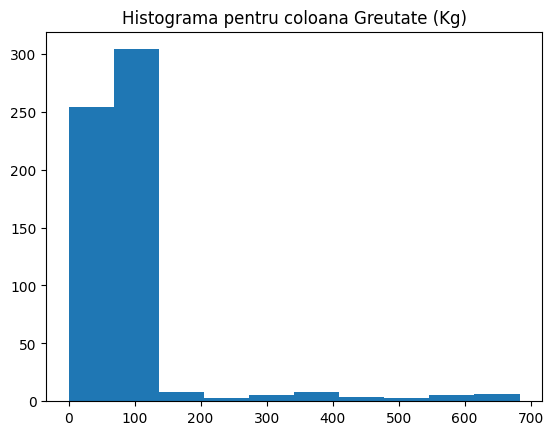

In [467]:
import matplotlib.pyplot as plt
import seaborn as sns
# Vom face histograma pentru valorile numerice de pe coloana Greutate (Kg)
plt.hist(train['Greutate (Kg)'])
plt.title('Histograma pentru coloana Greutate (Kg)')
plt.show()

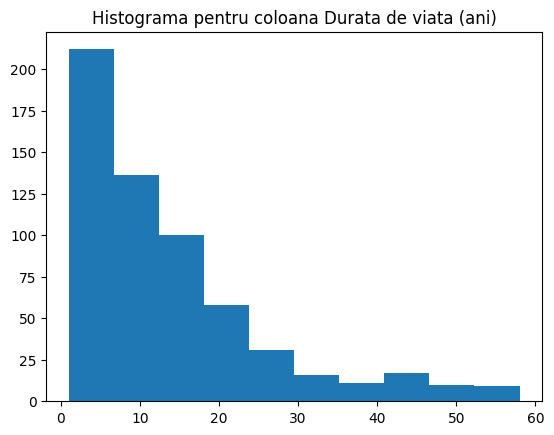

In [468]:
# Vom face histograma pentru valorile numerice de pe coloana Durata de viata (ani)
plt.hist(train['Durata de viata (ani)'])
plt.title('Histograma pentru coloana Durata de viata (ani)')
plt.show()

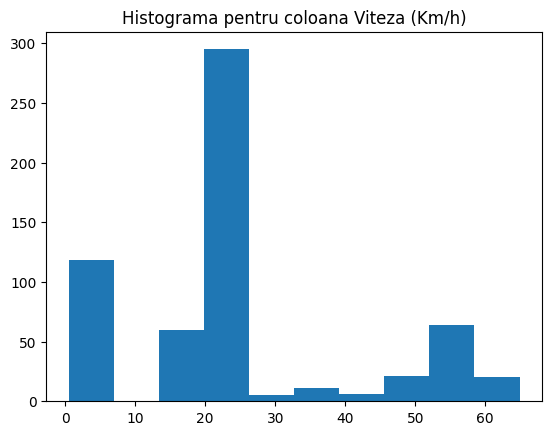

In [469]:
# Vom face histograma pentru valorile numerice de pe coloana Viteza (Km/h)
plt.hist(train['Viteza (Km/h)'])
plt.title('Histograma pentru coloana Viteza (Km/h)')
plt.show()

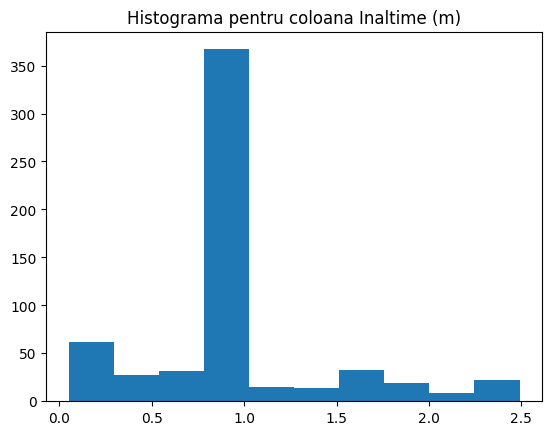

In [470]:
# Vom face histograma pentru valorile numerice de pe coloana Inaltime (m)
plt.hist(train['Inaltime (m)'])
plt.title('Histograma pentru coloana Inaltime (m)')
plt.show()

#### *Valori categorice:*

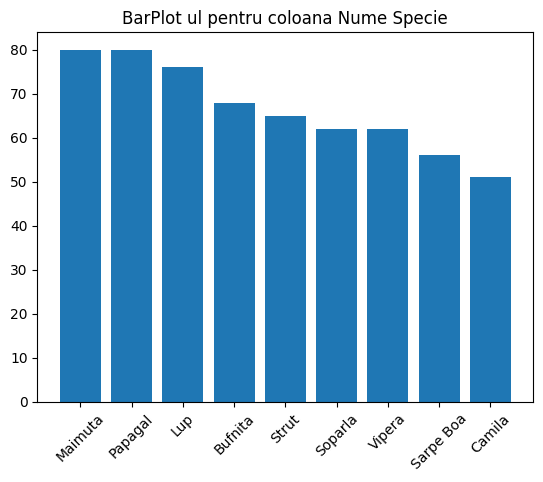

In [471]:
# Vom face barplot ul pentru valorile categorice de pe coloana Nume Specie
valori = train['Nume Specie'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.xticks(rotation=45)
plt.title('BarPlot ul pentru coloana Nume Specie')
plt.show()

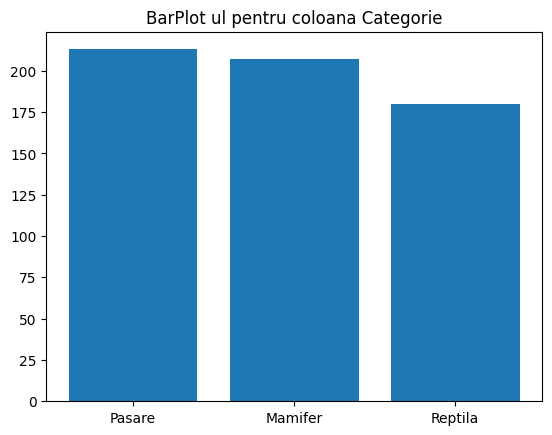

In [472]:
# Vom face barplot ul pentru valorile categorice de pe coloana Categorie
valori = train['Categorie'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Categorie')
plt.show()

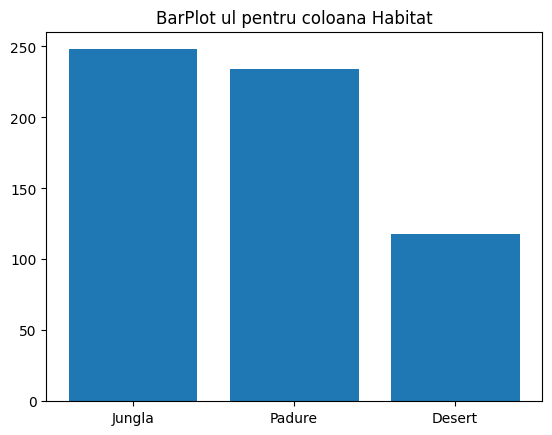

In [473]:
# Vom face barplot ul pentru valorile categorice de pe coloana Habitat
valori = train['Habitat'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Habitat')
plt.show()

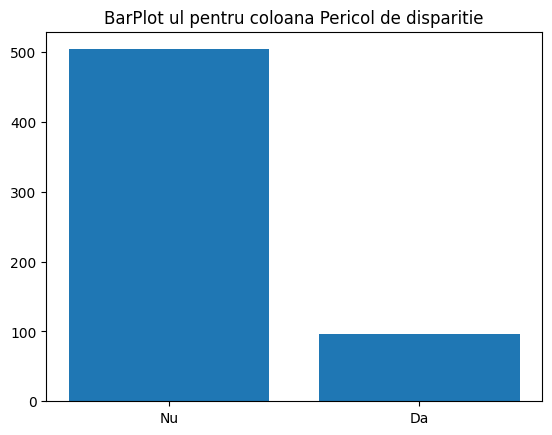

In [474]:
# Vom face barplot ul pentru valorile categorice de pe coloana Pericol de disparitie
valori = train['Pericol de disparitie'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Pericol de disparitie')
plt.show()

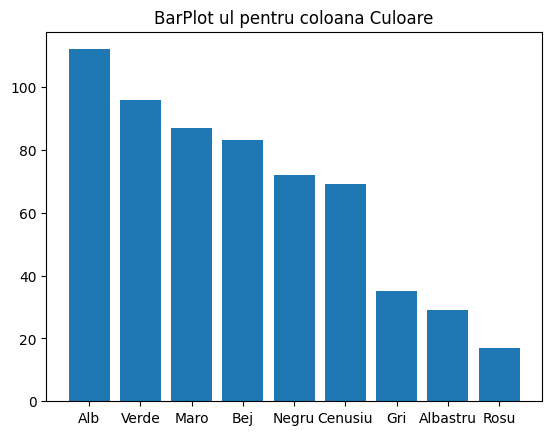

In [475]:
# Vom face barplot ul pentru valorile categorice de pe coloana Culoare
valori = train['Culoare'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Culoare')
plt.show()

### **Test**

---



#### *Valori numerice:*

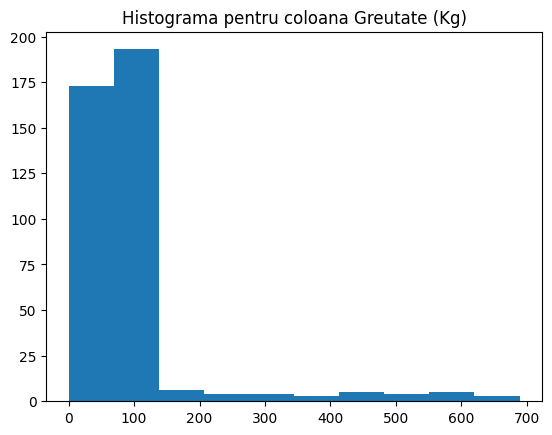

In [476]:
# Vom face histograma pentru valorile numerice de pe coloana Greutate (Kg)
plt.hist(test['Greutate (Kg)'])
plt.title('Histograma pentru coloana Greutate (Kg)')
plt.show()

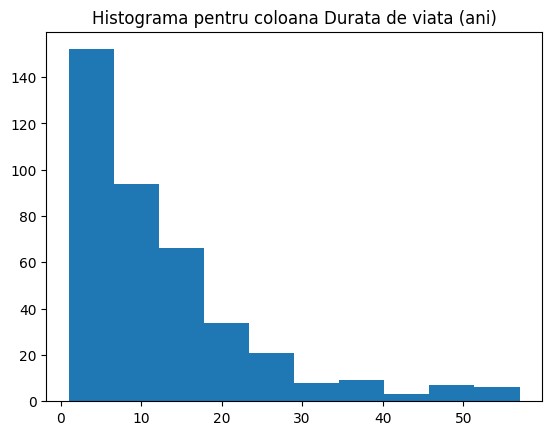

In [477]:
# Vom face histograma pentru valorile numerice de pe coloana Durata de viata (ani)
plt.hist(test['Durata de viata (ani)'])
plt.title('Histograma pentru coloana Durata de viata (ani)')
plt.show()

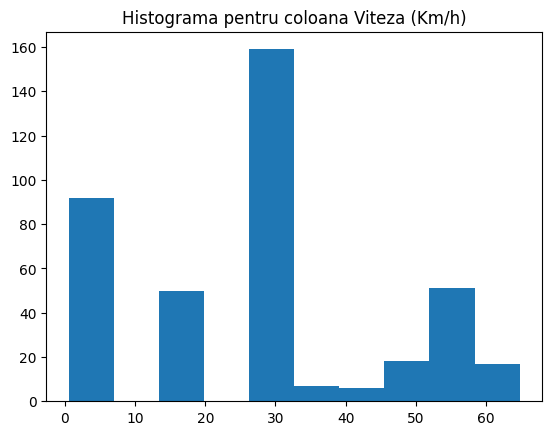

In [478]:
# Vom face histograma pentru valorile numerice de pe coloana Viteza (Km/h)
plt.hist(test['Viteza (Km/h)'])
plt.title('Histograma pentru coloana Viteza (Km/h)')
plt.show()

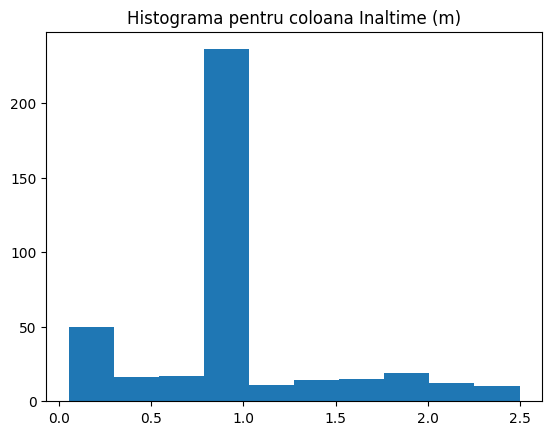

In [479]:
# Vom face histograma pentru valorile numerice de pe coloana Inaltime (m)
plt.hist(test['Inaltime (m)'])
plt.title('Histograma pentru coloana Inaltime (m)')
plt.show()

#### *Valori categorice:*

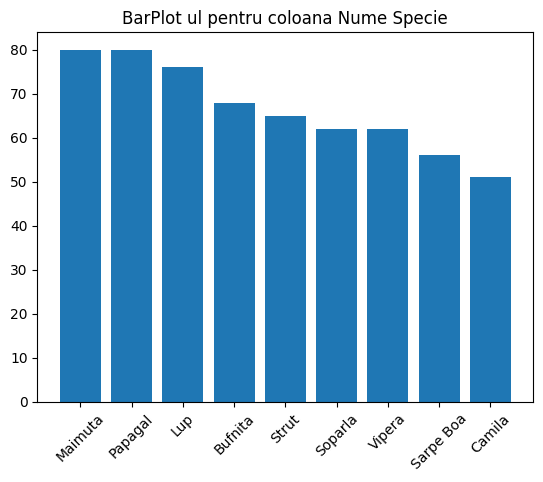

In [480]:
# Vom face barplot ul pentru valorile categorice de pe coloana Nume Specie
valori = train['Nume Specie'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.xticks(rotation=45)
plt.title('BarPlot ul pentru coloana Nume Specie')
plt.show()

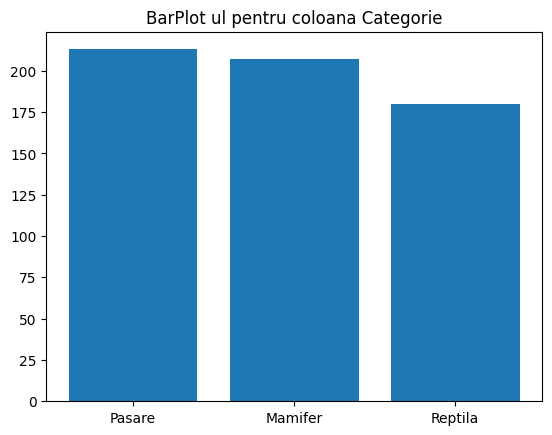

In [481]:
# Vom face barplot ul pentru valorile categorice de pe coloana Categorie
valori = train['Categorie'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Categorie')
plt.show()

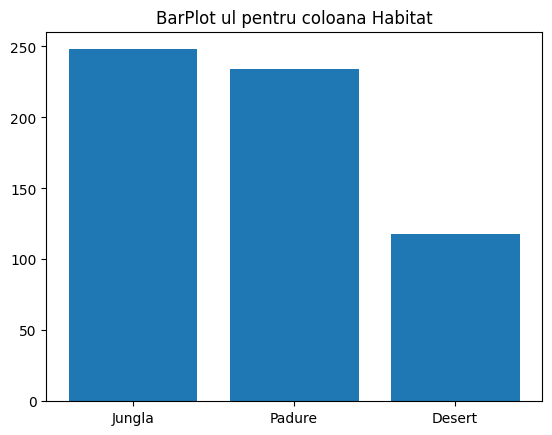

In [482]:
# Vom face barplot ul pentru valorile categorice de pe coloana Habitat
valori = train['Habitat'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Habitat')
plt.show()

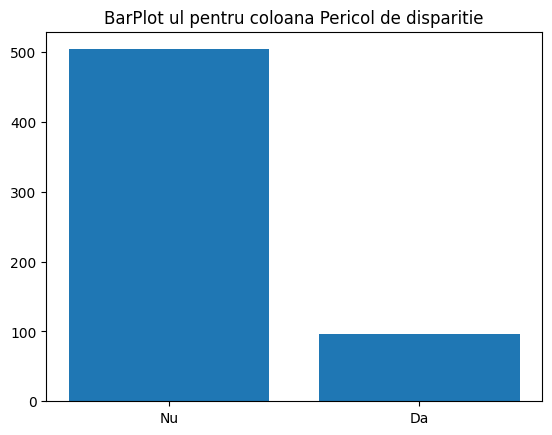

In [483]:
# Vom face barplot ul pentru valorile categorice de pe coloana Pericol de disparitie
valori = train['Pericol de disparitie'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Pericol de disparitie')
plt.show()

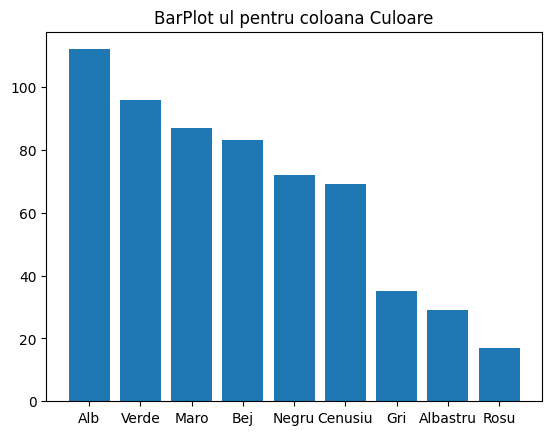

In [484]:
# Vom face barplot ul pentru valorile categorice de pe coloana Culoare
valori = train['Culoare'].value_counts()
x = np.array(valori.index)
y = np.array(valori.values)
plt.bar(x, y)
plt.title('BarPlot ul pentru coloana Culoare')
plt.show()

## ***6. Detectarea outlinerilor***

---



### **Train**

---



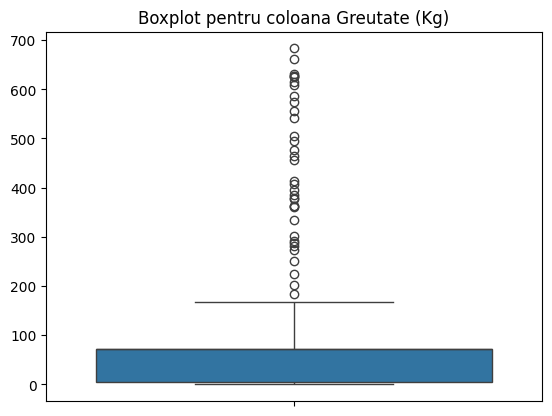

In [485]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Greutate (Kg)
x = np.array(train['Greutate (Kg)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Greutate (Kg)")
plt.show()

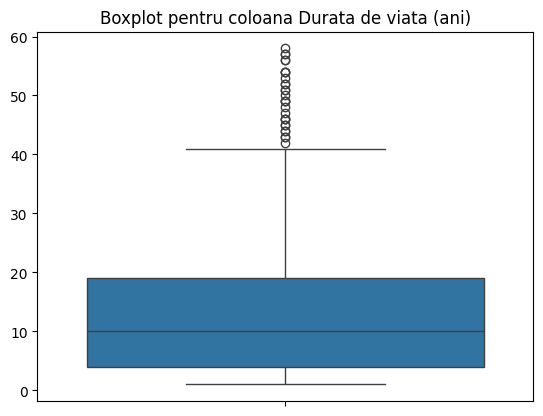

In [486]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Durata de viata (ani)
x = np.array(train['Durata de viata (ani)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Durata de viata (ani)")
plt.show()

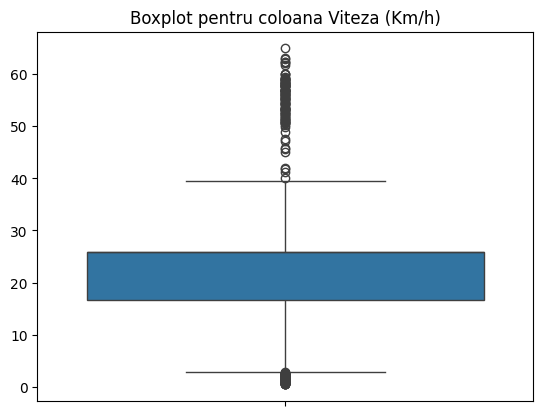

In [487]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Viteza (Km/h)
x = np.array(train['Viteza (Km/h)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Viteza (Km/h)")
plt.show()

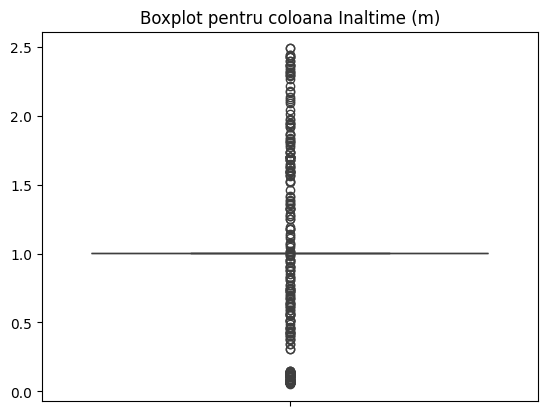

In [488]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Inaltime (m)
x = np.array(train['Inaltime (m)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Inaltime (m)")
plt.show()

### **Test**

---



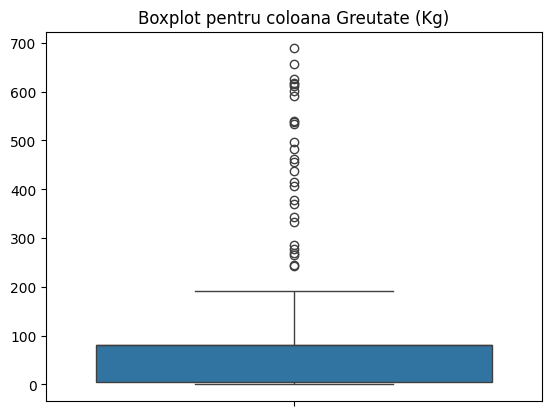

In [489]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Greutate (Kg)
x = np.array(test['Greutate (Kg)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Greutate (Kg)")
plt.show()

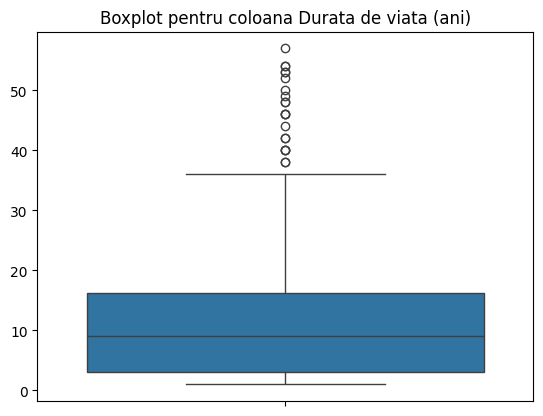

In [490]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Durata de viata (ani)
x = np.array(test['Durata de viata (ani)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Durata de viata (ani)")
plt.show()

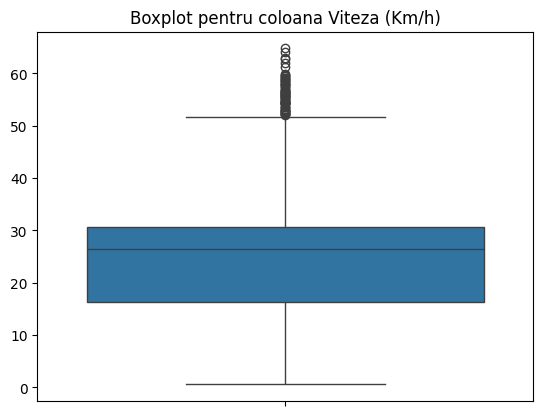

In [491]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Viteza (Km/h)
x = np.array(test['Viteza (Km/h)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Viteza (Km/h)")
plt.show()

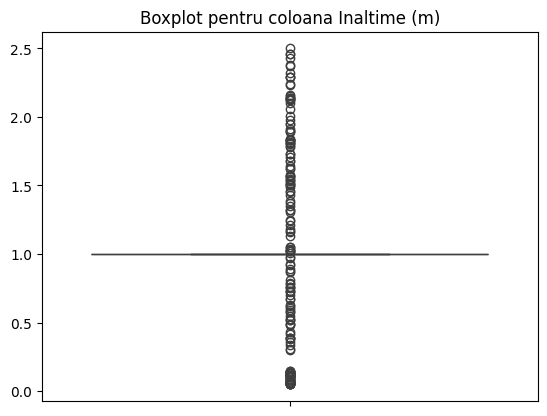

In [492]:
# Vom face boxplot ul pentru valorile numerice de pe coloana Inaltime (m)
x = np.array(test['Inaltime (m)'])
sns.boxplot(x)
plt.title("Boxplot pentru coloana Inaltime (m)")
plt.show()

## ***7. Analiza corelatiilor***

---



### **Train**

---



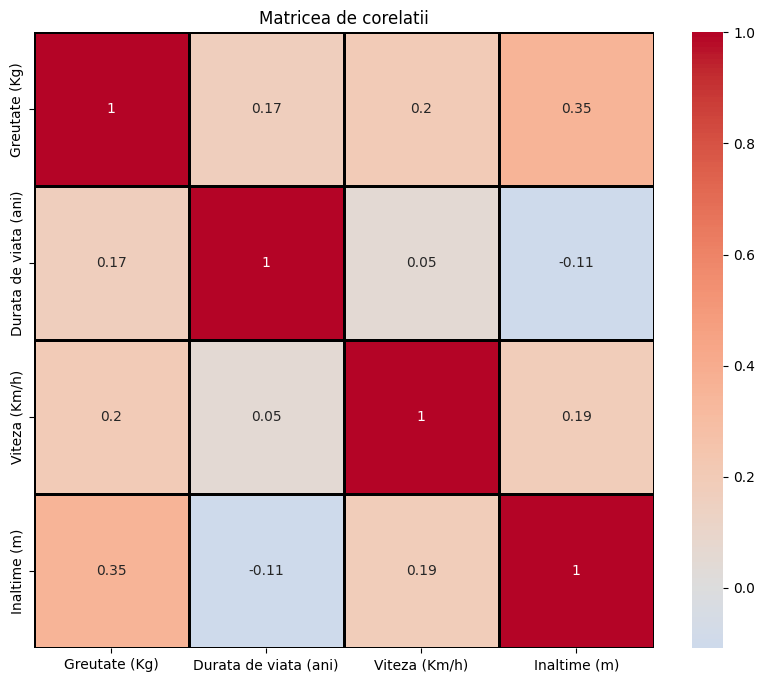

In [493]:
# Vom face heatmap ul pentru valorile numerice
train_numeric = train.select_dtypes(include=['number'])
corelatii = train_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corelatii, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Matricea de corelatii')
plt.show()

### **Test**

---



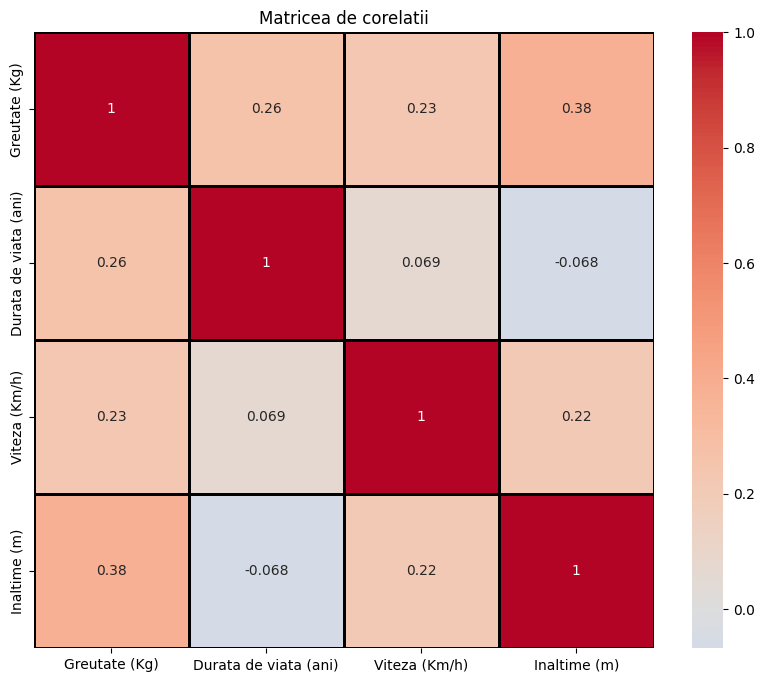

In [494]:
# Vom face heatmap ul pentru valorile numerice
test_numeric = test.select_dtypes(include=['number'])
corelatii = test_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corelatii, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Matricea de corelatii')
plt.show()

## ***8. Analiza relatiilor cu variabila tinta***

---



### **Train**

---



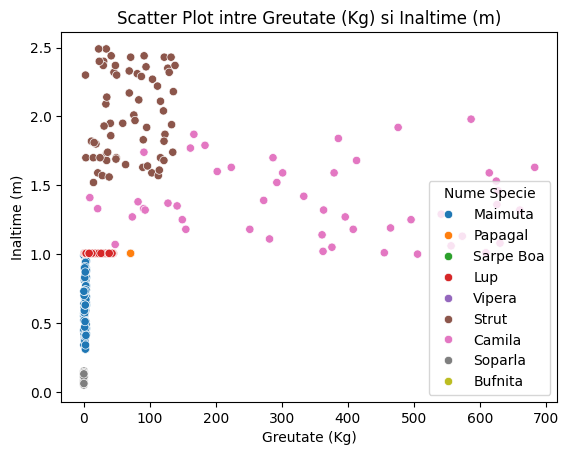

In [495]:
# Vom face un scatterplot folosind coloanele Greutate (Kg) si Inaltime (m)
sns.scatterplot(data=train, x='Greutate (Kg)', y='Inaltime (m)', hue='Nume Specie')
plt.title('Scatter Plot intre Greutate (Kg) si Inaltime (m)')
plt.xlabel('Greutate (Kg)')
plt.ylabel('Inaltime (m)')
plt.legend(title="Nume Specie", loc='best')
plt.show()

### **Test**

---



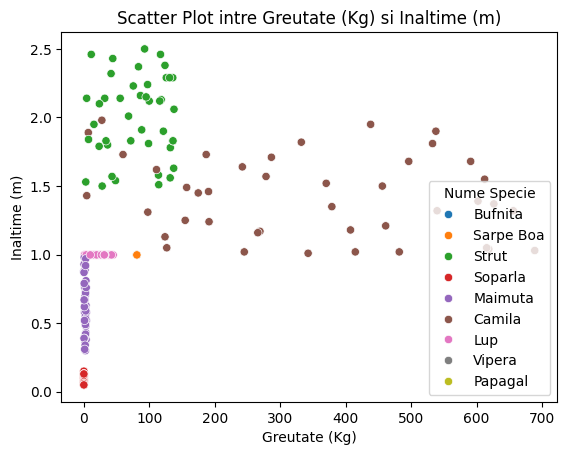

In [496]:
# Vom face un scatterplot folosind coloanele Greutate (Kg) si Inaltime (m)
sns.scatterplot(data=test, x='Greutate (Kg)', y='Inaltime (m)', hue='Nume Specie')
plt.title('Scatter Plot intre Greutate (Kg) si Inaltime (m)')
plt.xlabel('Greutate (Kg)')
plt.ylabel('Inaltime (m)')
plt.legend(title="Nume Specie", loc='best')
plt.show()

## ***9. Pregatirea datelor***

---



In [497]:
# Punem in X_train valorile din train
# fara coloana Nume Specie pentru ca pe aia vrem sa o prezicem
# si o punem in y_train
X_train = train.drop(columns=['Nume Specie'])
y_train = train['Nume Specie']

# Punem in X_test valorile din test
# fara coloana Nume Specie pentru ca pe aia vrem sa o prezicem
# si o punem in y_test
X_test = test.drop(columns=['Nume Specie'])
y_test = test['Nume Specie']

## ***10. OneHotEncoder pentru datele categorice si Normalizare pentru datele numerice***

---



In [498]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Facem o lista ce contine coloanele cu valori categorice din tabel
coloane_categorice = ['Categorie', 'Habitat', 'Pericol de disparitie', 'Culoare']

# Facem o lista ce contine coloanele cu valori numerice din tabel
coloane_numerice = ['Greutate (Kg)', 'Durata de viata (ani)', 'Viteza (Km/h)', 'Inaltime (m)']

# Aplicam OneHotEncoding pentru X_train si X_test
X_train_codificat = pd.get_dummies(X_train, columns=coloane_categorice, drop_first=True)
X_test_codificat = pd.get_dummies(X_test, columns=coloane_categorice, drop_first=True)

# Aplicam StandardScaler pentru coloanele numerice
scaler = StandardScaler()
X_train_codificat[coloane_numerice] = scaler.fit_transform(X_train_codificat[coloane_numerice])
X_test_codificat[coloane_numerice] = scaler.transform(X_test_codificat[coloane_numerice])

## ***11. Antrenarea modelului***

---



In [499]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_codificat, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## ***12. Evaluare pe test***

---



### **Acuratetea**

---



In [500]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Facem vectorul de predictii
y_prezis = model.predict(X_test_codificat)

# Calculam acuratetea
acuratetea = accuracy_score(y_test, y_prezis)
# Afisam acuratetea cu 2 zecimale
print("Acuratete:", round(acuratetea, 2))

Acuratete: 0.99


### **Precizia, recall, F1-score**

---



In [501]:
# Afisam precizia, recall, F1-score
print(classification_report(y_test, y_prezis))

              precision    recall  f1-score   support

     Bufnita       1.00      1.00      1.00        48
      Camila       1.00      1.00      1.00        42
         Lup       1.00      1.00      1.00        60
     Maimuta       1.00      1.00      1.00        42
     Papagal       1.00      1.00      1.00        23
   Sarpe Boa       0.98      0.93      0.96        46
     Soparla       1.00      1.00      1.00        50
       Strut       1.00      1.00      1.00        43
      Vipera       0.94      0.98      0.96        46

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



### **Matricea de confuzie**

---



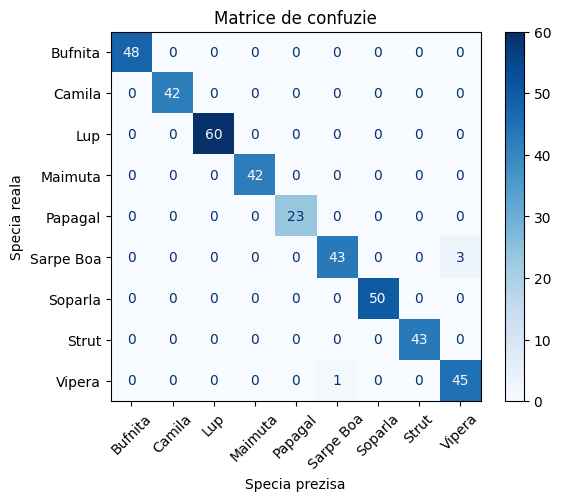

In [502]:
# Facem matricea de confuzie
matrice_confuzie = confusion_matrix(y_test, y_prezis)
display = ConfusionMatrixDisplay(confusion_matrix=matrice_confuzie, display_labels=model.classes_)
display.plot(cmap='Blues')
plt.title('Matrice de confuzie')
plt.xticks(rotation=45)
plt.xlabel('Specia prezisa')
plt.ylabel('Specia reala')
plt.show()

### **Graficul de erori**

---



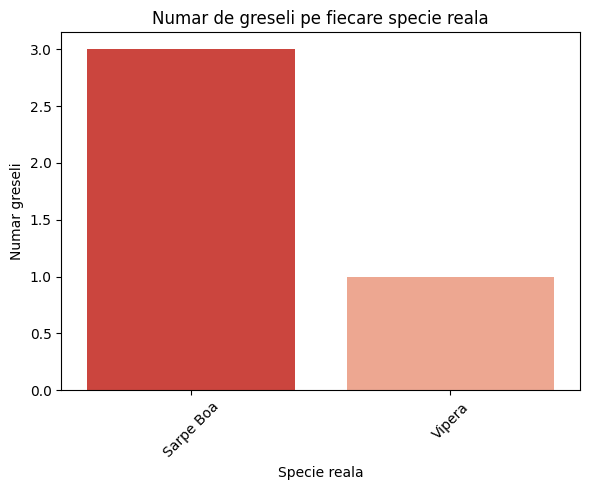

In [503]:
# Facem un dictionar cu 2 chei una pentru y_test si cealalta pentru y_pred
comparare = {
    'real': y_test,
    'prezis': y_prezis
}
# Facem un dataframe cu dictionarul de mai sus
erori_tabel = pd.DataFrame(comparare)

# Luam doar randurile prezise gresit
erori = erori_tabel[erori_tabel['real'] != erori_tabel['prezis']]

# Luam numarul de greseli pentru fiecare specie
erori_pe_clasa = erori['real'].value_counts()

# Afisam graficul de erori
plt.figure(figsize=(6, 5))
sns.barplot(x=erori_pe_clasa.index, y=erori_pe_clasa.values, palette='Reds_r', hue=erori_pe_clasa.index)
plt.title('Numar de greseli pe fiecare specie reala')
plt.xlabel('Specie reala')
plt.ylabel('Numar greseli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()